### <b style="color:yellow">Data Classification

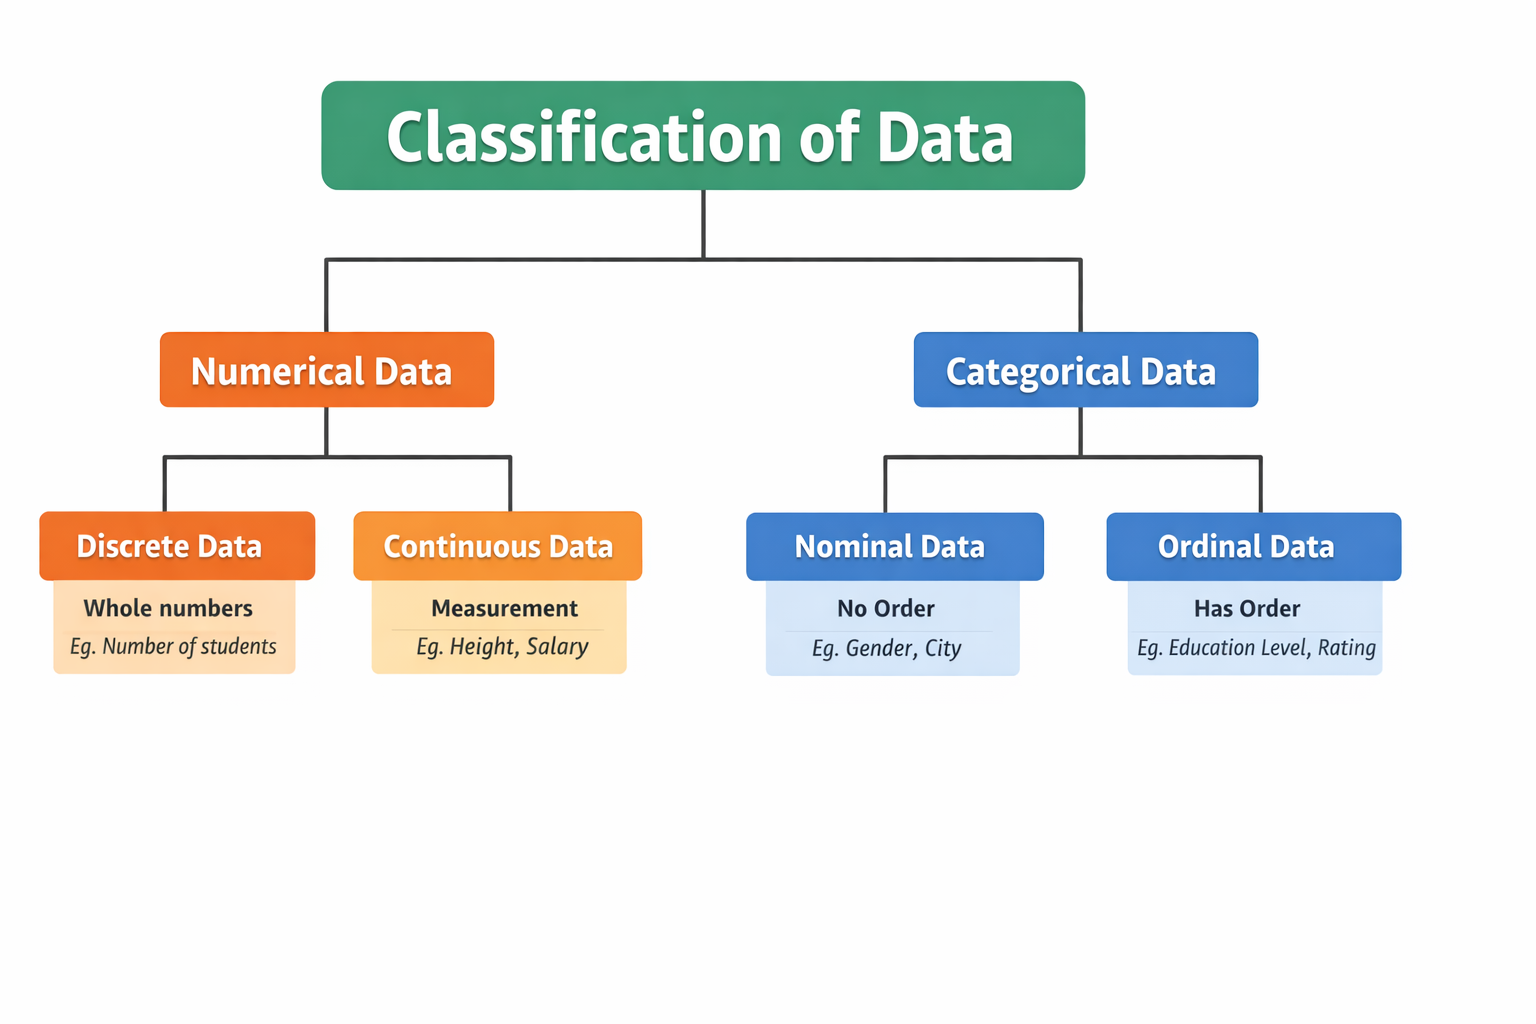

In [18]:
from IPython.display import Image, display

display(Image("data_classification.png", width=500, height=30))


### <b style="color:yellow">Definition of Encoding 

    Encoding is the process of converting categorical (text) data into numerical form so that machine learning algorithms can understand and process it.

#### Example:
    Gender: Male, Female 

#### After Encoding: 
    Male → 0
    Female → 1

    Because ML models work only with numbers, not text.

###  <b style="color:yellow">Why Encoding is Used

    Machine Learning algorithms are based on mathematical calculations, such as:

        Distance calculation
        
        Matrix operations
        
        Gradient computation

    These operations work only on numbers, not strings.

#### Example:

    ❌ Model cannot understand:
        City = "Hyderabad"

    ✅ Model understands: 
        City = 0

### <b style="color:yellow">Why Encoding is Important

    Encoding is important because:

        

#### <b style="color:green">Reason 1: </b>ML models accept only numeric input

            Algorithms like:
            
            Linear Regression
            
            Logistic Regression
            
            Decision Tree
            
            SVM
            
            Neural Networks

            cannot process text directly.

#### <b style="color:green">Reason 2: </b> Improves model performance

            Proper encoding helps the model:

                Learn patterns correctly
                
                Avoid wrong relationships
                
                Improve accuracy

#### <b style="color:green">Reason 3: </b>Preserves order (for ordinal data)

            Example:

                Low < Medium < High

                Ordinal encoding preserves this order.

## <b style="color:yellow">important points to be remember  
    Rule 1️⃣️

    If the column is ordinal data and it is an input feature (NOT target column)
    ➡️ Use OrdinalEncoder

    Rule 2️⃣

    If the column is ordinal data and it is the target column
    ➡️ Use LabelEncoder ✅ (Correct)

| Column Type                    | Encoder to Use              |
| ------------------------------ | --------------------------- |
| Ordinal Feature Column         | OrdinalEncoder              |
| Nominal Feature Column         | OneHotEncoder (Recommended) |
| Target Column (classification) | LabelEncoder                |


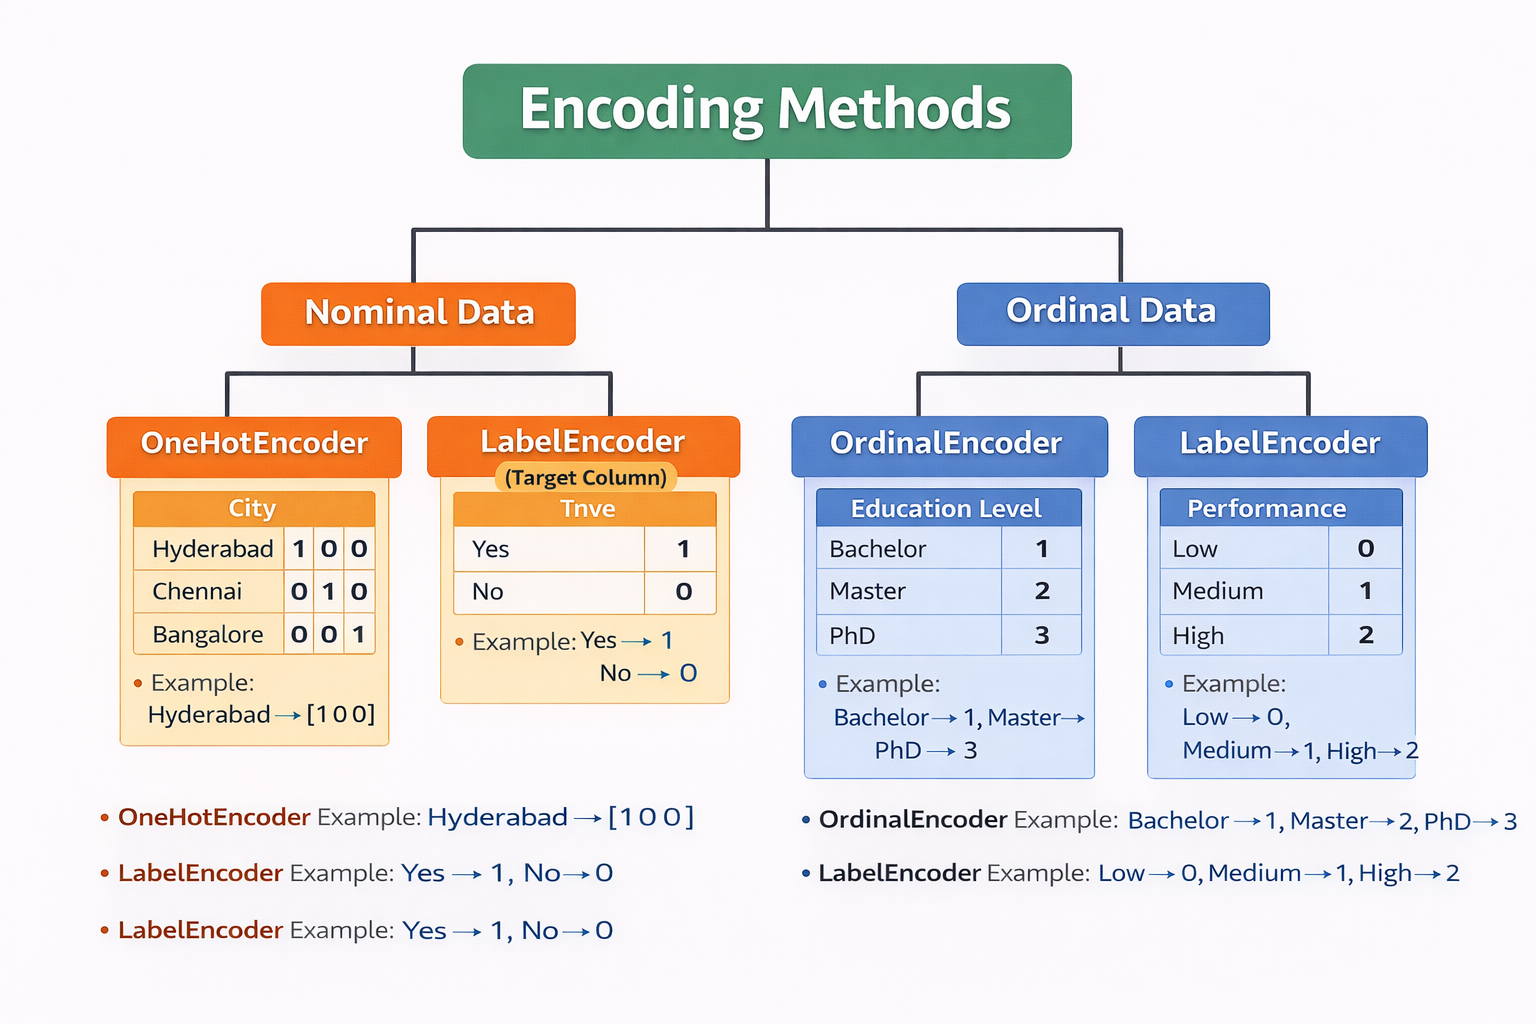

In [19]:
from IPython.display import Image, display

display(Image("encoding methods for categorical data.png", width=500, height=300))


### <b style="color:yellow">Performing Oridinal Encoding 

In [43]:
import pandas as pd 
import numpy as np

In [23]:
dataset = pd.read_csv("Employee_Skill_Dataset.csv")

In [26]:
dataset.head(10)

,Employee_ID,Experience_Level,Education,Performance,Promotion
0,101,Beginner,High School,Low,No
1,102,Intermediate,Bachelor,Medium,No
2,103,Advanced,Master,High,Yes
3,104,Beginner,Bachelor,Medium,No
4,105,Advanced,PhD,High,Yes
5,106,Intermediate,Master,Medium,Yes
6,107,Beginner,High School,Low,No
7,108,Advanced,PhD,High,Yes
8,109,Intermediate,Bachelor,Medium,No
9,110,Advanced,Master,High,Yes


#### Idenifying the type of data 
    Experience_Level ------> Ordinal Data (recommend ordinal encoder)
    Education        ------> Ordinal Data (recommend ordinal encoder)
    Performance      ------> Ordinal Data (recommend ordinal encoder)
    Promotion        ------> Ordinal Data (recommend label encoder)


In [34]:
from sklearn.preprocessing import OrdinalEncoder

# create encoder object
oe = OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']])

# select Education column properly (2D)
X = oe.fit_transform(dataset.iloc[:, [-3]])

print(X)


[[0.]
 [1.]
 [2.]
 [1.]
 [3.]
 [2.]
 [0.]
 [3.]
 [1.]
 [2.]]


In [47]:
# for multiple columns 

education_order = ["High School", "Bachelor", "Master", "PhD"]
experience_order = ["Beginner", "Intermediate", "Advanced"]
performance_order = ["Low", "Medium", "High"]

oe = OrdinalEncoder(categories=[
    education_order,
    experience_order,
    performance_order
])

dataset[["Education", "Experience_Level", "Performance"]] = oe.fit_transform(
    dataset[["Education", "Experience_Level", "Performance"]]
)

print(dataset)

ValueError: could not convert string to float: 'High School'

In [41]:
oe.categories_

[array(['High School', 'Bachelor', 'Master', 'PhD'], dtype=object),
 array(['Beginner', 'Intermediate', 'Advanced'], dtype=object),
 array(['Low', 'Medium', 'High'], dtype=object)]

### <b style="color:yellow"> Performing Label Encoder on Target variable

In [39]:
from sklearn.preprocessing import LabelEncoder 

# object to LabelEncoder
le = LabelEncoder() 

dataset["Promotion"] = le.fit_transform(dataset["Promotion"]) 

print(dataset)

   Employee_ID  Experience_Level  Education  Performance  Promotion
0          101               0.0        0.0          0.0          0
1          102               1.0        1.0          1.0          0
2          103               2.0        2.0          2.0          1
3          104               0.0        1.0          1.0          0
4          105               2.0        3.0          2.0          1
5          106               1.0        2.0          1.0          1
6          107               0.0        0.0          0.0          0
7          108               2.0        3.0          2.0          1
8          109               1.0        1.0          1.0          0
9          110               2.0        2.0          2.0          1


In [40]:
dataset.to_csv("after proper encoding.csv")

### <b style="color:yellow"> Important points to be remember

    Always identify whether the column is categorical or numerical before encoding.
    
    Check whether categorical data is nominal (no order) or ordinal (has order).
    
    Use OneHotEncoder for nominal feature columns.
    
    Use OrdinalEncoder for ordinal feature columns.
    
    Use LabelEncoder only for the target column, not for input feature columns.
    
    Always provide correct order of categories manually when using OrdinalEncoder.
    
    Categories in OrdinalEncoder must be passed as a list of lists.
    
    The order of categories must match the logical ranking of the data.
    
    Always pass 2D input to OrdinalEncoder and OneHotEncoder, not 1D.
    
    Select columns using double brackets dataset[['column']] instead of single brackets.
    
    When encoding multiple columns, ensure categories order matches column order.
    
    Always fit encoder on training data and transform test data, not fit on test data.
    
    Encoding converts text data into numerical format so ML models can understand it.
    
    Machine learning algorithms cannot work directly with text data.
    
    OneHotEncoder creates separate binary columns for each category.
    
    OrdinalEncoder assigns numeric values based on category order.
    
    LabelEncoder assigns numeric labels to target classes.
    
    Always verify encoded output using print() or dataset.head().
    
    Save encoder using pickle or joblib for future predictions.
    
    Encoding is an important step in the data preprocessing pipeline before model training.